<a href="https://colab.research.google.com/github/gustavo-ogimenes/AV8/blob/main/questao_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Sistema: naftaleno
Adjacency e neighbors salvos em: huckel_output/adjacency_naftaleno.csv e huckel_output/neighbors_naftaleno.csv
Parâmetros: α_C=0.0, α_N=0.5, β_CC=-1.0, β_CN=-1.0
Átomos N (1..10): []
Energias (autovalores) [unid. de β]:
[-2.302776 -1.618034 -1.302776 -1.       -0.618034  0.618034  1.
  1.302776  1.618034  2.302776]
HOMO idx=5, E_HOMO=-0.618034 | LUMO idx=6, E_LUMO=0.618034 | Egap=1.236068
Autovalores salvos em: huckel_output/eigenvals_naftaleno.csv
Espectro salvo em: huckel_output/spectrum_naftaleno.png
Populações q_i salvas em: huckel_output/q_naftaleno.csv
Ordens de ligação p_ij salvas em: huckel_output/pij_naftaleno.csv
Sem N neste sistema; nenhum p_ij próximo a N.
Coeficientes HOMO/LUMO salvos em: huckel_output/orbs_naftaleno.csv


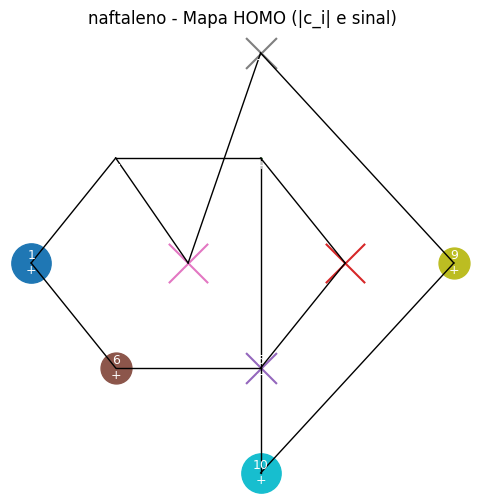

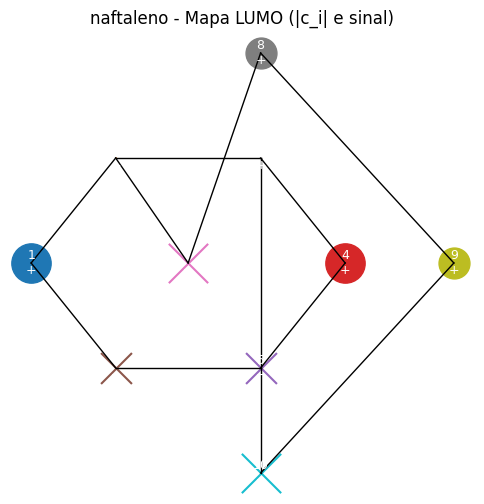

Mapas HOMO/LUMO salvos em: huckel_output/naftaleno_HOMO.png huckel_output/naftaleno_LUMO.png
Esquema estrutural salvo em: huckel_output/structure_naftaleno.png

Sistema: quinolina
Adjacency e neighbors salvos em: huckel_output/adjacency_quinolina.csv e huckel_output/neighbors_quinolina.csv
Parâmetros: α_C=0.0, α_N=0.5, β_CC=-1.0, β_CN=-1.0
Átomos N (1..10): [7]
Energias (autovalores) [unid. de β]:
[-2.267026 -1.593263 -1.231569 -1.       -0.527097  0.703283  1.
  1.38422   1.668928  2.362525]
HOMO idx=5, E_HOMO=-0.527097 | LUMO idx=6, E_LUMO=0.703283 | Egap=1.230380
Autovalores salvos em: huckel_output/eigenvals_quinolina.csv
Espectro salvo em: huckel_output/spectrum_quinolina.png
Populações q_i salvas em: huckel_output/q_quinolina.csv
Ordens de ligação p_ij salvas em: huckel_output/pij_quinolina.csv
Ordens p_ij próximas a N salvas em: huckel_output/pij_nearN_quinolina.csv
Coeficientes HOMO/LUMO salvos em: huckel_output/orbs_quinolina.csv


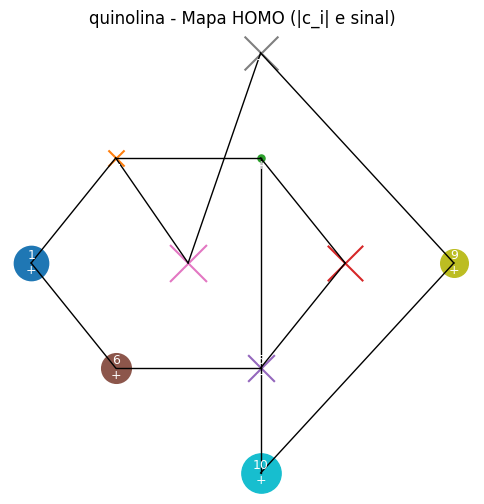

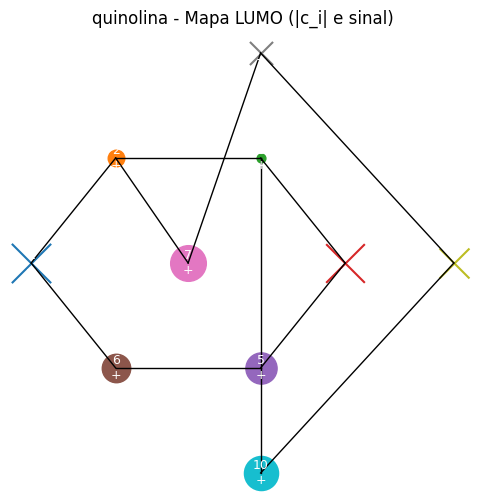

Mapas HOMO/LUMO salvos em: huckel_output/quinolina_HOMO.png huckel_output/quinolina_LUMO.png
Esquema estrutural salvo em: huckel_output/structure_quinolina.png

Sistema: diaza(7,9)
Adjacency e neighbors salvos em: huckel_output/adjacency_diaza(7,9).csv e huckel_output/neighbors_diaza(7,9).csv
Parâmetros: α_C=0.0, α_N=0.5, β_CC=-1.0, β_CN=-1.0
Átomos N (1..10): [7, 9]
Energias (autovalores) [unid. de β]:
[-2.247411 -1.507386 -1.229406 -0.916839 -0.494949  0.732344  1.078491
  1.43594   1.75016   2.399056]
HOMO idx=5, E_HOMO=-0.494949 | LUMO idx=6, E_LUMO=0.732344 | Egap=1.227294
Autovalores salvos em: huckel_output/eigenvals_diaza(7,9).csv
Espectro salvo em: huckel_output/spectrum_diaza(7,9).png
Populações q_i salvas em: huckel_output/q_diaza(7,9).csv
Ordens de ligação p_ij salvas em: huckel_output/pij_diaza(7,9).csv
Ordens p_ij próximas a N salvas em: huckel_output/pij_nearN_diaza(7,9).csv
Coeficientes HOMO/LUMO salvos em: huckel_output/orbs_diaza(7,9).csv


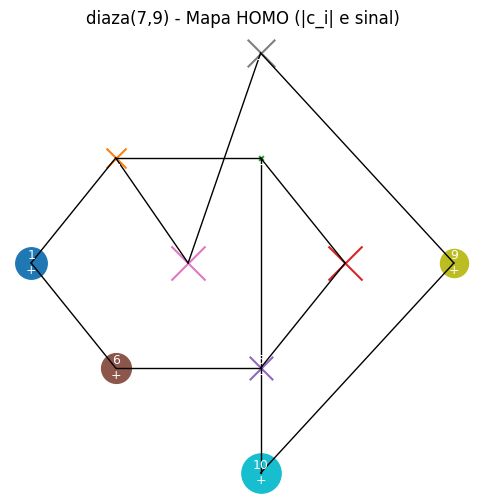

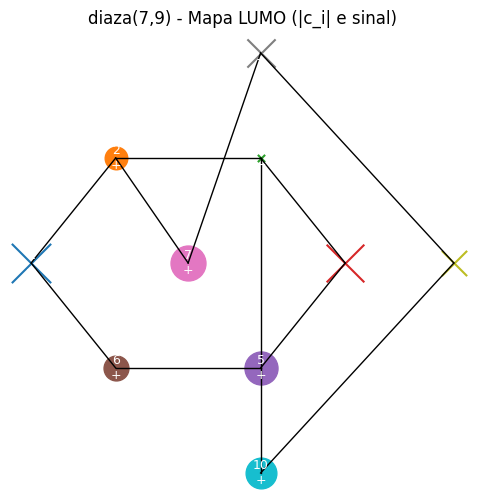

Mapas HOMO/LUMO salvos em: huckel_output/diaza(7,9)_HOMO.png huckel_output/diaza(7,9)_LUMO.png
Esquema estrutural salvo em: huckel_output/structure_diaza(7,9).png

Resumo salvo em: huckel_output/summary_homo_lumo_gap.csv
Espectros comparativos salvos em: huckel_output/spectra_all_side_by_side.png

Arquivos gerados na pasta: huckel_output
 - adjacency_<sistema>.csv  (matriz de conectividade)
 - neighbors_<sistema>.csv   (lista de vizinhos)
 - eigenvals_<sistema>.csv   (autovalores E/|β| com ocupação)
 - spectrum_<sistema>.png    (espectro com HOMO/LUMO marcados)
 - spectra_all_side_by_side.png (comparativo lado-a-lado)
 - q_<sistema>.csv  (populações)
 - pij_<sistema>.csv (ordens de ligação completas)
 - pij_nearN_<sistema>.csv (ordens próximas a N)
 - orbs_<sistema>.csv (coeficientes HOMO/LUMO)
 - structure_<sistema>.png (esquema numerado com N destacado)
 - <sistema>_HOMO.png, <sistema>_LUMO.png (mapas)


In [6]:
# huckel_analysis_full.py
"""
Análise Hückel (Naftaleno, Quinolina, Diaza escolhida) - Versão completa e fortemente comentada.
Este arquivo gera tabelas e figuras pedidas no enunciado:
 - esquemas numerados das estruturas (naftaleno, quinolina, diaza) com N destacados
 - matriz de conectividade e lista de vizinhos
 - espectro de energias com HOMO/LUMO marcados (por sistema)
 - espectros lado-a-lado (comparativo)
 - tabela de autovalores com ocupação
 - populações q_i (CSV)
 - ordens de ligação p_ij (CSV) e p_ij apenas para ligações próximas a N
 - coeficientes HOMO/LUMO (CSV)
 - mapas HOMO/LUMO (PNG)
Todas as saídas são gravadas na pasta 'huckel_output'.
Dependências: numpy, pandas, matplotlib
"""

# -----------------------
# Imports e por que usamos cada um
# -----------------------
import numpy as np                       # álgebra linear e arrays numéricos
import pandas as pd                      # criação e escrita de tabelas (CSV)
import matplotlib.pyplot as plt          # geração de figuras (plots e mapas)
from math import cos, sin, pi            # funções trigonométricas usadas em layouts
import os                                # manipulação de diretórios/arquivos

# -----------------------
# Parâmetros físicos / numéricos
# -----------------------
# Estamos trabalhando em unidades relativas a |β| (valor absoluto de β).
# alpha_C e alpha_N_shift definem os valores na diagonal da matriz H.
# beta é o termo de acoplamento (off-diagonal) entre sítios ligados.
# Nota: no modelo Hückel simples, normalmente α e β são constantes; aqui usamos
# alpha_C = 0 como referência e alpha_N_shift > 0 para diferenciar N.
# -----------------------
# Usando valores do slide da aula, unidades de |β|
# -----------------------
alpha_C = 0.0          # α para carbono
alpha_N_shift = 0.5    # α para N = α_C + alpha_N_shift
beta_CC = -1.0         # β para C-C aromático
beta_CN = -1.0         # β para C-N aromático.

# -----------------------
# Definição da rede/ligação (grafo da molécula)
# -----------------------
# edges_1based contém pares (i,j) com índices 1-based para facilitar leitura.
# Internamente o código converte para 0-based (i-1, j-1) quando necessário.
# A topologia definida corresponde a uma numeração de naftaleno (10 sítios),
# com fusão dos anéis via aresta entre 2 e 3 (conforme enunciado original).
edges_1based = [
    (1,2),(2,3),(3,4),(4,5),(5,6),(6,1),  # primeiro anel
    (2,7),(7,8),(8,9),(9,10),(10,3)      # segundo anel
]
N_sites = 10  # número de sítios π (átomos alvo no modelo Hückel)

# -----------------------
# Layouts para desenho das figuras
# -----------------------
# Temos duas opções:
# - circle_layout: distribui nós em círculo (útil quando não queremos coords manuais)
# - custom_pos: coordenadas manuais que representam visualmente os dois anéis
def circle_layout(n, radius=1.0, phase=pi/2):
    """
    Retorna um dicionário {index0: (x,y)} para n pontos em círculo.
    phase desloca o ângulo inicial; radius é o raio do círculo.
    Útil como fallback se preferirmos um layout simétrico.
    """
    coords = {}
    for i in range(n):
        theta = phase + 2*pi*i/n
        coords[i] = (radius*cos(theta), radius*sin(theta))
    return coords

# Coordenadas manuais simples para representar dois anéis fusionados (naftaleno).
# As chaves são índices 0-based (0..9) correspondendo a sítios 1..10.
custom_pos = {
    0: (-1.0, 0.0),  # 1
    1: (-0.3, 0.85), # 2
    2: (0.9, 0.85),  # 3
    3: (1.6, 0.0),   # 4
    4: (0.9, -0.85), # 5
    5: (-0.3, -0.85),# 6
    6: (0.3, 0.0),   # 7 (fusão interna)
    7: (0.9, 1.7),   # 8
    8: (2.5, 0.0),   # 9
    9: (0.9, -1.7)   # 10
}

# Escolhemos usar custom_pos como padrão para os esquemas químicos (pos é usado nas funções de plot)
pos = custom_pos.copy()
# Se preferir o layout circular, comente a linha acima e descomente a próxima:
# pos = circle_layout(N_sites, radius=1.2)

# -----------------------
# Função que constrói a matriz H (Hamiltoniana Hückel) e lista de ligações (0-based)
# -----------------------
def build_system(atom_types):
    """
    atom_types: lista de comprimento N_sites contendo 'C' ou 'N' para cada sítio.
    Retorna:
      - H: matriz (N_sites x N_sites) com elementos H_ii = alpha (C ou N) e
           H_ij = beta se i-j estiverem ligados segundo edges_1based.
      - bonds0: lista de tuplas (i0,j0) com índices 0-based das ligações.
    Observações importantes:
      - Trabalhamos com floats; inicializamos H com zeros e preenchemos as diagonais
        e off-diagonais correspondentes a ligações.
      - edges_1based facilita leitura no código fonte (mais natural para químicos),
        aqui convertemos para 0-based.
    """
    H = np.zeros((N_sites, N_sites), dtype=float)

    # Diagonais (α)
    for i in range(N_sites):
        H[i, i] = alpha_C if atom_types[i] == 'C' else alpha_C + alpha_N_shift

    bonds0 = []
    # Ligações (β)
    for i, j in edges_1based:
        i0, j0 = i - 1, j - 1
        if atom_types[i0] == 'N' or atom_types[j0] == 'N':
            H[i0, j0] = beta_CN
            H[j0, i0] = beta_CN
        else:
            H[i0, j0] = beta_CC
            H[j0, i0] = beta_CC
        bonds0.append((i0, j0))

    return H, bonds0


# -----------------------
# Diagonalização: autovalores (energias) e autovetores (coeficientes dos MOs)
# -----------------------
def diagonalize(H):
    """
    Usa np.linalg.eigh (específico para matrizes hermitianas/simétricas).
    Retorna:
      - E: vetor de autovalores em ordem ascendente
      - C: matriz cujas colunas são os autovetores (C[:, mu] = vetor do MO mu)
    Nota: np.linalg.eigh garante ordenação ascendente dos autovalores; isso é útil
    para identificar ocupação por contagem de elétrons.
    """
    E, C = np.linalg.eigh(H)
    return E, C

# -----------------------
# Contagem de elétrons π
# -----------------------
def electron_count(atom_types):
    """
    Aqui a regra do enunciado foi: 1 elétron π por sítio.
    Assim, número de elétrons = número de sítios = len(atom_types).
    Em casos reais, dependendo do sistema, a contagem pode ser diferente.
    """
    return len(atom_types)

# -----------------------
# Populações atômicas q_i
# -----------------------
def populations_q(C, n_elec):
    """
    Calcula as populações atômicas q_i usando ocupação por orbitais moleculares.
    Assumimos elétrons pareados: cada orbital ocupado contribui com n_mu = 2 elétrons.
    Fórmula: q_i = sum_{orbitais ocupados m} 2 * (c_{i,m})^2
    - C é a matriz de coeficientes (N_sites x N_MO)
    - n_elec // 2 determina quantos orbitais estão ocupados (oc_orbs)
    Retorna vetor q de tamanho N_sites.
    """
    occ_orbs = n_elec // 2         # número de orbitais ocupados (integer division)
    q = np.zeros(C.shape[0])
    for m in range(occ_orbs):
        q += 2.0 * (C[:, m]**2)    # soma quadrados dos coeficientes ponderados por 2 elétrons
    return q

# -----------------------
# Ordens de ligação p_ij
# -----------------------
def bond_orders_pij(C, bonds, n_elec):
    """
    Calcula p_ij = sum_{ocupados} 2 * c_{i,mu} * c_{j,mu}
    - bonds: lista de tuplas (i,j) em 0-based indicando ligações químicas reais
    - retorna dicionário pij[(i,j)] = valor
    Observação: p_ij pode ser interpretado qualitativamente como força da ligação no modelo Hückel.
    """
    occ_orbs = n_elec // 2
    pij = {}
    for (i, j) in bonds:
        s = 0.0
        for m in range(occ_orbs):
            s += 2.0 * C[i, m] * C[j, m]
        pij[(i, j)] = s
    return pij

# -----------------------
# Identificação de HOMO/LUMO baseada em n_elec (corrigida)
# -----------------------
def homo_lumo(E, n_elec):
    """
    Determina índices de HOMO e LUMO a partir de E e da contagem de elétrons.
    Usamos:
      occ_orbs = n_elec // 2
      HOMO index = occ_orbs - 1
      LUMO index = occ_orbs
    Retorna (homo_idx, lumo_idx, E[homo], E[lumo], gap)
    Validamos que occ_orbs esteja num intervalo coerente.
    """
    occ_orbs = n_elec // 2
    if occ_orbs <= 0 or occ_orbs >= len(E):
        raise ValueError("Número de elétrons/órbitais incoerente")
    homo = occ_orbs - 1
    lumo = occ_orbs
    return homo, lumo, E[homo], E[lumo], E[lumo] - E[homo]

# -----------------------
# Função de plot dos mapas de orbital (HOMO/LUMO)
# -----------------------
def plot_orbital_map(vec, title, savepath=None, positions=None):
    """
    Desenha um mapa onde:
      - o tamanho do marcador é proporcional a |c_i| (magnitude do coeficiente)
      - o tipo/marker e o texto indicam o sinal de c_i (positivo/negativo)
    Parâmetros:
      vec: vetor de coeficientes c_i para o orbital considerado (tamanho N_sites)
      positions: dicionário {index0: (x,y)} para desenho; se None usa pos global
      savepath: caminho onde a imagem será salva (PNG). Se None, apenas mostra.
    Observações:
      - protegemos contra divisão por zero se todos os coeficientes forem zero.
      - marcadores simétricos ajudam a visualizar nodos (pontos com mudança de sinal).
    """
    if positions is None:
        positions = pos
    mags = np.abs(vec)
    if mags.max() == 0:
        sizes = 100 * np.ones_like(mags)
    else:
        sizes = 800 * (mags / mags.max())   # escala arbitrária para visual agradável

    plt.figure(figsize=(6,6))
    # desenha ligações como linhas pretas
    for (a, b) in edges_1based:
        i, j = a-1, b-1
        xi, yi = positions[i]
        xj, yj = positions[j]
        plt.plot([xi, xj], [yi, yj], linewidth=1, color='k')

    # desenha nós com marcador e texto do índice + sinal
    for i in range(N_sites):
        x, y = positions[i]
        sign = '+' if vec[i] >= 0 else '−'    # símbolo visual de sinal (pode ser trocado)
        marker = 'o' if vec[i] >= 0 else 'x'  # 'o' para positivo, 'x' para negativo
        plt.scatter([x], [y], s=sizes[i], marker=marker)
        plt.text(x, y, f"{i+1}\n{sign}", ha='center', va='center', fontsize=9, color='white')

    plt.title(title)
    plt.axis('off')
    if savepath:
        # salva em alta resolução
        plt.savefig(savepath, bbox_inches='tight', dpi=200)
    plt.show()
    plt.close()

# -----------------------
# Funções utilitárias para salvar informações adicionais como CSVs e figuras
# -----------------------
def save_connectivity(edges, outpath_csv_adj, outpath_csv_neighbors):
    """
    Gera e salva:
      - matriz de adjacência (N_sites x N_sites) em CSV (0/1)
      - lista legível de vizinhos por sítio em CSV
    edges está em 1-based; a função converte internamente.
    Retorna os DataFrames (df_adj, df_nei) caso seja necessário uso posterior.
    """
    adj = np.zeros((N_sites, N_sites), dtype=int)
    neighbors = {i+1: [] for i in range(N_sites)}
    for a, b in edges:
        i, j = a-1, b-1
        adj[i, j] = 1
        adj[j, i] = 1
        neighbors[a].append(b)
        neighbors[b].append(a)
    df_adj = pd.DataFrame(adj, index=np.arange(1, N_sites+1), columns=np.arange(1, N_sites+1))
    df_adj.to_csv(outpath_csv_adj)
    df_nei = pd.DataFrame([(site, ','.join(map(str, sorted(nei)))) for site, nei in neighbors.items()],
                          columns=['site', 'neighbors'])
    df_nei.to_csv(outpath_csv_neighbors, index=False)
    return df_adj, df_nei

def save_eigen_table_and_plot(E, n_elec, name, outdir):
    """
    Salva uma tabela de autovalores E/|β| com sinal de ocupação e cria um pequeno plot vertical
    onde HOMO e LUMO são destacados.
    Retorna (caminho_csv, caminho_png).
    """
    occ_orbs = n_elec // 2
    # marca cada orbital como 'occupied' ou 'unoccupied' para o relatório
    occ = ['occupied' if i < occ_orbs else 'unoccupied' for i in range(len(E))]
    dfE = pd.DataFrame({
        'mu': np.arange(1, len(E)+1),
        'E_over_beta': np.round(E, 8),
        'occupation': occ
    })
    eig_csv = os.path.join(outdir, f"eigenvals_{name}.csv")
    dfE.to_csv(eig_csv, index=False)

    # plot vertical simples para visual do espectro
    plt.figure(figsize=(3,6))
    xs = np.zeros_like(E)
    plt.scatter(xs, E, s=40)
    homo = occ_orbs - 1
    lumo = occ_orbs
    plt.scatter([0], [E[homo]], s=120, edgecolors='k', facecolors='none', label='HOMO')
    plt.scatter([0], [E[lumo]], s=120, marker='s', edgecolors='k', facecolors='none', label='LUMO')
    plt.title(f"Espectro - {name}")
    plt.ylabel("E / |β|")
    plt.xticks([])   # não precisamos de ticks em x para este gráfico vertical
    plt.legend()
    plt.tight_layout()
    savepath = os.path.join(outdir, f"spectrum_{name}.png")
    plt.savefig(savepath, dpi=200)
    plt.close()
    return eig_csv, savepath

def plot_side_by_side_spectra(E_dict, n_elec, outpath):
    """
    Recebe um dicionário {nome_sistema: E_array} e plota os espectros lado-a-lado
    (útil para comparar deslocamentos de energia entre sistemas).
    sharey=True é usado para facilitar comparação vertical.
    """
    fig, axes = plt.subplots(1, len(E_dict), figsize=(3*len(E_dict), 6), sharey=True)
    if len(E_dict) == 1:
        axes = [axes]  # garante que axes seja iterável quando há só 1 sub-plot
    for ax, (nm, E) in zip(axes, E_dict.items()):
        ax.scatter(np.ones_like(E), E, s=40)
        occ_orbs = n_elec // 2
        homo = occ_orbs - 1
        lumo = occ_orbs
        ax.scatter([1], [E[homo]], s=100, edgecolors='k', facecolors='none')
        ax.scatter([1], [E[lumo]], s=100, marker='s', edgecolors='k', facecolors='none')
        ax.set_title(nm)
        ax.set_xticks([])
    axes[0].set_ylabel("E / |β|")
    plt.tight_layout()
    plt.savefig(outpath, dpi=200)
    plt.close()

import pandas as pd

def pij_near_N(pij, types):
    """
    Filtra as ordens de ligação p_ij próximas a átomos de Nitrogênio (N).

    Aceita `pij` como:
    - pandas.DataFrame com colunas ['i', 'j', 'p_ij']
    - dict com chaves (i, j) e valores p_ij
    - dict com listas ou escalares

    Parameters
    ----------
    pij : dict ou pandas.DataFrame
        Informações de ligações.
        - Se for dict {(i, j): valor}, será convertido para DataFrame.
    types : list
        Lista com os tipos dos átomos (índices do array correspondem ao ID do átomo).

    Returns
    -------
    pandas.DataFrame
        Ligações filtradas, apenas as que envolvem Nitrogênio.
    """


    if isinstance(pij, dict):
        if all(isinstance(k, tuple) and len(k) == 2 for k in pij.keys()):
            # Converte para DataFrame
            data = [(i, j, val) for (i, j), val in pij.items()]
            pij = pd.DataFrame(data, columns=['i', 'j', 'p_ij'])
        else:
            # Se for dict "normal", tenta normalizar
            if all(not isinstance(v, (list, tuple, pd.Series)) for v in pij.values()):
                pij = {k: [v] for k, v in pij.items()}
            pij = pd.DataFrame(pij)


    required_cols = {'i', 'j', 'p_ij'}
    if not required_cols.issubset(set(pij.columns)):
        raise ValueError(f"O DataFrame pij precisa ter as colunas {required_cols}, mas tem {list(pij.columns)}")


    if 'bond' not in pij.columns:
        pij = pij.copy()
        pij['bond'] = pij.apply(lambda row: f"{row['i']}-{row['j']}", axis=1)


    nitrogen_atoms = [idx for idx, atom_type in enumerate(types) if atom_type == 'N']


    mask = pij['i'].isin(nitrogen_atoms) | pij['j'].isin(nitrogen_atoms)
    df_p_nearN = pij[mask].copy()

    return df_p_nearN


def draw_structure(types, edges, pos_dict, title, savepath):
    """
    Desenha um esquema estrutural simples (linhas entre sítios) com numeração dos sítios
    e destacando os átomos N. Salva a figura em savepath.
    - types: lista de 'C'/'N'
    - edges: lista de arestas 1-based (usamos a mesma edges_1based)
    - pos_dict: dicionário de posições 0-based -> (x,y)
    Observação estética: colorimos N de laranja para destaque.
    """
    plt.figure(figsize=(5,5))
    # desenha arestas/ligações
    for a, b in edges:
        i, j = a-1, b-1
        xi, yi = pos_dict.get(i, (0,0))
        xj, yj = pos_dict.get(j, (0,0))
        plt.plot([xi, xj], [yi, yj], linewidth=1.2, color='k')

    # desenha nós e texto com o número do sítio e tipo de átomo
    for i in range(N_sites):
        x, y = pos_dict.get(i, (0,0))
        isN = (types[i] == 'N')
        plt.scatter([x], [y], s=300 if not isN else 420, marker='o',
                    color='tab:blue' if not isN else 'tab:orange')
        txt = f"{i+1}\n{types[i]}"
        plt.text(x, y-0.22, txt, ha='center', va='center', fontsize=9, color='red')

    plt.title(title)
    plt.axis('off')
    plt.savefig(savepath, dpi=200, bbox_inches='tight')
    plt.close()

# -----------------------
# Definição dos sistemas a serem estudados
# -----------------------
# Mantemos a mesma numeração para os três sistemas para facilitar comparações.
systems = {
    "naftaleno": ['C']*10,
    "quinolina": ['C','C','C','C','C','C','N','C','C','C'],  # N em sítio 7
    "diaza(7,9)": ['C','C','C','C','C','C','N','C','N','C'], # N em 7 e 9
}

# Diretório de saída (será criado se não existir)
outdir = "huckel_output"
os.makedirs(outdir, exist_ok=True)

# -----------------------
# Loop principal: para cada sistema montamos H, diagonalizamos, calculamos grandezas, salvamos arquivos e plots
# -----------------------
summary_rows = []  # acumula resumo HOMO/LUMO/gap para todos os sistemas
E_all = {}         # armazena autovalores de cada sistema para o plot comparativo final

for name, types in systems.items():
    # Cabeçalho informativo para o usuário ao executar o script
    print("\n" + "="*70)
    print(f"Sistema: {name}")
    print("="*70)

    # 1) Monta matriz H e lista de ligações (0-based)
    H, bonds = build_system(types)

    # 2) Salva a matriz de conectividade (adjacency) e a lista de vizinhos
    adj_csv = os.path.join(outdir, f"adjacency_{name}.csv")
    neighbors_csv = os.path.join(outdir, f"neighbors_{name}.csv")
    df_adj, df_nei = save_connectivity(edges_1based, adj_csv, neighbors_csv)
    print("Adjacency e neighbors salvos em:", adj_csv, "e", neighbors_csv)

    # 3) Diagonaliza H -> E (autovalores), C (autovetores)
    E, C = diagonalize(H)

    # 4) Conta elétrons π (regra do enunciado: 1 elétron por sítio)
    n_elec = electron_count(types)

    # 5) Identifica HOMO/LUMO corretamente com base em n_elec
    homo_idx, lumo_idx, Eh, El, Eg = homo_lumo(E, n_elec)

    # Imprime parâmetros e algumas informações para checagem rápida
    print(f"Parâmetros: α_C={alpha_C}, α_N={alpha_C+alpha_N_shift}, β_CC={beta_CC}, β_CN={beta_CN}")
    print("Átomos N (1..10):", [i+1 for i, t in enumerate(types) if t == 'N'])
    print("Energias (autovalores) [unid. de β]:")
    print(np.round(E, 6))
    print(f"HOMO idx={homo_idx+1}, E_HOMO={Eh:.6f} | LUMO idx={lumo_idx+1}, E_LUMO={El:.6f} | Egap={Eg:.6f}")

    # 6) Salva autovalores e gera figura do espectro com HOMO/LUMO marcados
    eig_csv, spectrum_png = save_eigen_table_and_plot(E, n_elec, name, outdir)
    print("Autovalores salvos em:", eig_csv)
    print("Espectro salvo em:", spectrum_png)

    # Acumula autovalores para o gráfico comparativo posterior
    E_all[name] = E.copy()

    # 7) Calcula populações q_i e salva CSV (já no formato site/atom/q_i)
    q = populations_q(C, n_elec)
    df_q = pd.DataFrame({
        "site": np.arange(1, N_sites+1),
        "atom": types,
        "q_i": np.round(q, 6)
    }).set_index("site")
    q_csv = os.path.join(outdir, f"q_{name}.csv")
    df_q.to_csv(q_csv)
    print(f"Populações q_i salvas em: {q_csv}")

    # 8) Calcula ordens de ligação p_ij para todas as ligações e salva CSV
    pij = bond_orders_pij(C, bonds, n_elec)
    rows = []
    for (i, j), val in pij.items():
        rows.append({"bond(i-j)": f"{i+1}-{j+1}", "p_ij": round(val, 6)})
    df_p = pd.DataFrame(rows).sort_values("bond(i-j)").reset_index(drop=True)
    p_csv = os.path.join(outdir, f"pij_{name}.csv")
    df_p.to_csv(p_csv, index=False)
    print(f"Ordens de ligação p_ij salvas em: {p_csv}")

    # 9) Filtra e salva apenas ordens p_ij próximas a átomos N (se existirem)
    df_p_nearN = pij_near_N(pij, types)
    if not df_p_nearN.empty:
        p_nearN_csv = os.path.join(outdir, f"pij_nearN_{name}.csv")
        df_p_nearN.to_csv(p_nearN_csv, index=False)
        print("Ordens p_ij próximas a N salvas em:", p_nearN_csv)
    else:
        print("Sem N neste sistema; nenhum p_ij próximo a N.")

    # 10) Salva os vetores HOMO e LUMO (coeficientes c_i) em CSV
    df_orbs = pd.DataFrame({
        "site": np.arange(1, N_sites+1),
        "c_HOMO": np.round(C[:, homo_idx], 8),
        "c_LUMO": np.round(C[:, lumo_idx], 8),
        "abs_c_HOMO": np.round(np.abs(C[:, homo_idx]), 8),
        "abs_c_LUMO": np.round(np.abs(C[:, lumo_idx]), 8),
    }).set_index("site")
    orb_csv = os.path.join(outdir, f"orbs_{name}.csv")
    df_orbs.to_csv(orb_csv)
    print(f"Coeficientes HOMO/LUMO salvos em: {orb_csv}")

    # 11) Gera mapas HOMO e LUMO (figuras) usando plot_orbital_map
    homopng = os.path.join(outdir, f"{name}_HOMO.png")
    lumopng = os.path.join(outdir, f"{name}_LUMO.png")
    # plot_orbital_map salva e mostra as figuras; nós passamos 'pos' para garantir numeração consistente
    plot_orbital_map(C[:, homo_idx], f"{name} - Mapa HOMO (|c_i| e sinal)", savepath=homopng, positions=pos)
    plot_orbital_map(C[:, lumo_idx], f"{name} - Mapa LUMO (|c_i| e sinal)", savepath=lumopng, positions=pos)
    print("Mapas HOMO/LUMO salvos em:", homopng, lumopng)

    # 12) Desenha esquema estrutural (apenas topologia + numeração, N destacado)
    structure_png = os.path.join(outdir, f"structure_{name}.png")
    draw_structure(types, edges_1based, pos, f"{name} - Esquema (N destacado)", structure_png)
    print("Esquema estrutural salvo em:", structure_png)

    # 13) Acumula resumo por sistema para salvar tabela final
    summary_rows.append({
        "sistema": name,
        "N_sites": N_sites,
        "N_elec": n_elec,
        "E_HOMO": round(Eh, 6),
        "E_LUMO": round(El, 6),
        "Egap": round(Eg, 6)
    })

# -----------------------
# Salvamos um CSV resumo com HOMO/LUMO/GAP para todos os sistemas
# -----------------------
df_summary = pd.DataFrame(summary_rows)
summary_csv = os.path.join(outdir, "summary_homo_lumo_gap.csv")
df_summary.to_csv(summary_csv, index=False)
print("\nResumo salvo em:", summary_csv)

# -----------------------
# Plot comparativo: espectros lado-a-lado para todos os sistemas (quando possível)
# -----------------------
try:
    comparative_png = os.path.join(outdir, "spectra_all_side_by_side.png")
    # assumimos n_elec igual para todos (1 elétron por sítio); usamos n_elec da última iteração
    plot_side_by_side_spectra(E_all, n_elec, comparative_png)
    print("Espectros comparativos salvos em:", comparative_png)
except Exception as e:
    # qualquer erro na plotagem comparativa não impede os arquivos já salvos anteriormente
    print("Não foi possível gerar espectros comparativos:", e)

# -----------------------
# Mensagem final com lista dos principais arquivos gerados
# -----------------------
print("\nArquivos gerados na pasta:", outdir)
print(" - adjacency_<sistema>.csv  (matriz de conectividade)")
print(" - neighbors_<sistema>.csv   (lista de vizinhos)")
print(" - eigenvals_<sistema>.csv   (autovalores E/|β| com ocupação)")
print(" - spectrum_<sistema>.png    (espectro com HOMO/LUMO marcados)")
print(" - spectra_all_side_by_side.png (comparativo lado-a-lado)")
print(" - q_<sistema>.csv  (populações)")
print(" - pij_<sistema>.csv (ordens de ligação completas)")
print(" - pij_nearN_<sistema>.csv (ordens próximas a N)")
print(" - orbs_<sistema>.csv (coeficientes HOMO/LUMO)")
print(" - structure_<sistema>.png (esquema numerado com N destacado)")
print(" - <sistema>_HOMO.png, <sistema>_LUMO.png (mapas)")
